In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


2025-03-06 13:26:31.552401: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-06 13:26:31.552507: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-06 13:26:31.554594: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-06 13:26:31.569364: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-06 13:26:33.271713: W tensorflow/compiler/tf2

In [2]:
data = pd.read_csv("gwl_rain_processed2.csv")

In [3]:
col_list = list()
col_list.append(data.columns[0])
col_list += list(data.columns[-2:])
# col_list
data.drop(columns=col_list, inplace=True)

In [4]:
def create_dataset(data, look_back=1):
   X, y = [], []
   for i in range(len(data)-look_back-1):
       a = data[i:(i+look_back)]
       X.append(a)
       y.append(data.iloc[i + look_back])
   return np.array(X), np.array(y)

In [5]:
data['Date'] = pd.to_datetime(data['Date'])
date = data['Date']
data.set_index('Date',inplace=True)

data_scale = dict()
for col in data.columns:
    data_scale[col] = [data[col].min(),data[col].max()]
    data[col] = (data[col] - data_scale[col][0])/(data_scale[col][1] - data_scale[col][0])


In [6]:
data['Rainfall'] = data['Rainfall'].replace(0,0.0001)

In [7]:
look_back = 48
rain_data = data['Rainfall']
X, y = create_dataset(rain_data, look_back)
X = np.reshape(X,(X.shape[0],look_back,1))
print(X.shape)
print(X)

(239, 48, 1)
[[[1.00000000e-04]
  [1.00000000e-04]
  [1.00000000e-04]
  ...
  [2.94685316e-02]
  [8.94450046e-04]
  [1.00000000e-04]]

 [[1.00000000e-04]
  [1.00000000e-04]
  [1.00000000e-04]
  ...
  [8.94450046e-04]
  [1.00000000e-04]
  [4.35255497e-05]]

 [[1.00000000e-04]
  [1.00000000e-04]
  [9.92927635e-03]
  ...
  [1.00000000e-04]
  [4.35255497e-05]
  [1.00000000e-04]]

 ...

 [[1.18546571e-01]
  [1.16769552e-01]
  [3.83947835e-02]
  ...
  [3.65619738e-02]
  [6.66983211e-02]
  [1.85278850e-02]]

 [[1.16769552e-01]
  [3.83947835e-02]
  [3.72321021e-04]
  ...
  [6.66983211e-02]
  [1.85278850e-02]
  [7.38174974e-02]]

 [[3.83947835e-02]
  [3.72321021e-04]
  [1.00000000e-04]
  ...
  [1.85278850e-02]
  [7.38174974e-02]
  [7.75324664e-03]]]


In [8]:
model = Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(look_back,1)))
model.add(Dense(64))
model.add(Dense(128))
model.add(LSTM(128))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(1,activation='relu'))

model.compile(optimizer='adam', loss='mean_squared_error')#,metrics=['loss'])

2025-03-06 13:26:36.139942: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-03-06 13:26:36.202598: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-03-06 13:26:36.202700: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-03-06 13:26:36.207168: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-03-06 13:26:36.207306: I external/local_xla/xla/stream_executor

In [9]:
model.fit(X,y, batch_size=32, verbose=1, epochs=50)

Epoch 1/50


2025-03-06 13:26:42.596628: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2025-03-06 13:26:43.275408: I external/local_xla/xla/service/service.cc:168] XLA service 0x7efe60cae380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-03-06 13:26:43.275488: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-03-06 13:26:43.283100: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741247803.368109  527091 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 [==============================] - 7s 80ms/step - loss: 0.0169
Epoch 2/50
8/8 [==============================] - 0s 57ms/step - loss: 0.0163
Epoch 3/50
8/8 [==============================] - 0s 56ms/step - loss: 0.0156
Epoch 4/50
8/8 [==============================] - 0s 42ms/step - loss: 0.0122
Epoch 5/50
8/8 [==============================] - 0s 44ms/step - loss: 0.0112
Epoch 6/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0079
Epoch 7/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0076
Epoch 8/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0118
Epoch 9/50
8/8 [==============================] - 0s 62ms/step - loss: 0.0090
Epoch 10/50
8/8 [==============================] - 0s 57ms/step - loss: 0.0084
Epoch 11/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0087
Epoch 12/50
8/8 [==============================] - 0s 44ms/step - loss: 0.0075
Epoch 13/50
8/8 [==============================] - 0s 36ms/step - loss: 

In [10]:
y_pred = model.predict(X)

8/8 [==============================] - 3s 37ms/step


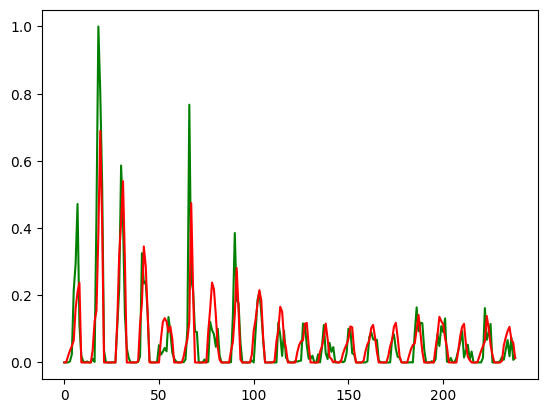

In [11]:
plt.plot(y,color='g')
plt.plot(y_pred,color='r')

In [12]:
def prepare_data(data,column,lookback=4):
    X, y = [], []
    for i in range(len(data[rain])-lookback-1):
        a = list(data[column][i:(i+lookback)])
        a.append(data[rain].iloc[(i+lookback)])
        X.append(a)
        y.append(data[column].iloc[i + lookback])
    return np.array(X), np.array(y)

In [13]:
import tensorflow as tf

def hebbian_update(model, X, y, hebb_lr=0.01):
    """
    Applies Hebbian Learning updates while ensuring shape compatibility.
    
    Args:
        model: The trained LSTM model.
        X: Input data (batch_size, time_steps, features).
        y: Ground truth labels.
        hebb_lr: Learning rate for Hebbian updates.
    """
    with tf.GradientTape() as tape:
        predictions = model(X, training=True)
        loss = tf.reduce_mean(tf.square(predictions - y))  # Standard MSE loss

    gradients = tape.gradient(loss, model.trainable_variables)

    # Convert tensors to float32
    X = tf.cast(X, tf.float32)
    predictions = tf.cast(predictions, tf.float32)

    for i, var in enumerate(model.trainable_variables):
        weight_shape = var.shape  

        # Handle LSTM kernel (input_dim, units)
        if "kernel" in var.name:
            hebbian_weight_update = hebb_lr * tf.matmul(tf.transpose(X[:, -1, :]), predictions)
        
        # Handle LSTM recurrent kernel (units, units)
        elif "recurrent_kernel" in var.name:
            hebbian_weight_update = hebb_lr * tf.matmul(tf.transpose(predictions), predictions)

        # Handle Bias (units,)
        elif "bias" in var.name:
            hebbian_weight_update = hebb_lr * tf.reduce_mean(predictions, axis=0)

        else:  # Default Hebbian update for dense layers
            hebbian_weight_update = hebb_lr * tf.matmul(tf.transpose(X[:, -1, :]), predictions)

        # Debugging shape issues
        print(f"Layer {i}: {var.name}")
        print(f"Variable Shape: {var.shape}")
        print(f"Hebbian Update Shape Before Reshaping: {hebbian_weight_update.shape}")

        # Ensure shape compatibility
        if hebbian_weight_update.shape != var.shape:
            hebbian_weight_update = tf.broadcast_to(hebbian_weight_update, var.shape)

        # Apply update
        var.assign_add(hebbian_weight_update)


In [14]:
# Compute Fisher Information for EWC
def compute_fisher_information(model, X, y):
    fisher_info = {}
    with tf.GradientTape() as tape:
        predictions = model(X, training=True)
        loss = tf.reduce_mean(tf.square(predictions - y))
    gradients = tape.gradient(loss, model.trainable_variables)

    for i, grad in enumerate(gradients):
        fisher_info[i] = tf.square(grad)  # Fisher Information Approximation

    return fisher_info

In [15]:
# Custom EWC Loss Function
def ewc_loss(model, base_loss, fisher_info, previous_weights, lambda_ewc=0.1):
    """ Adds EWC penalty to standard loss. """
    ewc_penalty = 0
    for i, var in enumerate(model.trainable_variables):
        if i in fisher_info:
            ewc_penalty += tf.reduce_sum(fisher_info[i] * tf.square(var - previous_weights[i]))

    return base_loss + lambda_ewc * ewc_penalty

In [16]:
models = dict()
predictions_dict = dict()
models['Rainfall'] = model
# Hyperparameters
look_back = 12
lambda_ewc = 0.25  # EWC regularization parameter

# Placeholder for Fisher Information (will be computed later)
fisher_information = {}
previous_weights = {}

In [17]:
from tensorflow.keras.layers import Layer
import tensorflow as tf

class ExtremeValueAttention(Layer):
    def __init__(self, **kwargs):
        super(ExtremeValueAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], input_shape[-1]),
                                 initializer="random_normal", trainable=True)
        self.b = self.add_weight(name="att_bias", shape=(input_shape[-1],),
                                 initializer="zeros", trainable=True)
        self.V = self.add_weight(name="att_vector", shape=(input_shape[-1], 1),
                                 initializer="random_normal", trainable=True)
        super(ExtremeValueAttention, self).build(input_shape)

    def call(self, inputs):
        # Compute absolute deviation from the mean (for extreme value detection)
        mean_seq = tf.reduce_mean(inputs, axis=1, keepdims=True)  # Mean across timesteps
        deviation = tf.abs(inputs - mean_seq)  # Absolute deviation from mean
        deviation = tf.reduce_mean(deviation, axis=-1, keepdims=True)  # Aggregate deviations
        
        # Standard attention mechanism
        score = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=[2, 0]) + self.b)

        # Scale attention scores based on deviation (extreme values get higher scores)
        scaled_score = score * deviation

        # Apply softmax to normalize attention weights
        attention_weights = tf.nn.softmax(tf.tensordot(scaled_score, self.V, axes=[2, 0]), axis=1)

        # Compute weighted sum (context vector)
        context_vector = attention_weights * inputs
        context_vector = tf.reduce_sum(context_vector, axis=1)  # Sum over time steps
        
        return context_vector, attention_weights


In [18]:
# from keras import backend as K
# from tensorflow.keras.optimizers import Adam
# rain = 'Rainfall'
# for column in data.columns[1:3]:
    
#     slice = data[[rain,column]]
#     X, y = prepare_data(slice,column,look_back)
#     # print(f"\nfor column {column}: \n{X}")

#     X = np.reshape(X, (X.shape[0], X.shape[1] , 1))

#     models[column] = Sequential()
#     models[column].add(LSTM(64, return_sequences=True, input_shape=((look_back + 1), 1)))
#     models[column].add(Dense(64))
#     models[column].add(Dense(128))
#     models[column].add(LSTM(128))
#     models[column].add(Dense(128))
#     models[column].add(Dense(32))
#     models[column].add(Dense(16))
#     models[column].add(Dense(1, activation='relu'))
    
#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)
#     # Compile model
#     models[column].compile(optimizer='adam', loss='mean_squared_error')
#     # models[column].fit(X,y,batch_size=12,epochs=10,verbose=1)
        
#     # Compute Fisher Information after initial training
#     fisher_information[column] = compute_fisher_information(models[column], X, y)
#     previous_weights[column] = {i: tf.identity(var) for i, var in enumerate(models[column].trainable_variables)}

#     # Train with Hebbian Learning and EWC
#     for epoch in range(50):  # Adjust epochs as needed
#         with tf.GradientTape() as tape:
#             predictions = models[column](X, training=True)
#             base_loss = tf.reduce_mean(tf.square(predictions - y))
#             total_loss = ewc_loss(models[column], base_loss, fisher_information[column], previous_weights[column])

#         gradients = tape.gradient(total_loss, models[column].trainable_variables)
#         models[column].optimizer.apply_gradients(zip(gradients, models[column].trainable_variables))

#     #     # Apply Hebbian Learning update
#         # hebbian_update(models[column], X, y, hebb_lr=0.01)
#     #     # hybrid_update(models[column], X, y, optimizer, hebb_lr=0.01)
    
#     print(f"Training completed for {column}")


#     prediction_i = models[column].predict(X)
#     predictions_dict[column] = prediction_i

In [19]:
import numpy as np
import tensorflow as tf
from keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate
from tensorflow.keras.optimizers import Adam
# import tensorflow_addons as tfa
from tensorflow.keras.activations import softplus, mish

rain = 'Rainfall'

for column in data.columns[1:]:
    # Select relevant columns
    slice = data[[rain, column]]

    # Prepare input features
    X_seq, y = prepare_data(slice, column, look_back)  # Sequential data
    X_static = X_seq[:, -1]  # Take the last value as the static feature (Rainfall)

    # Reshape inputs
    X_seq = np.reshape(X_seq, (X_seq.shape[0], X_seq.shape[1], 1))  # (samples, timesteps, 1)
    X_static = np.reshape(X_static, (X_static.shape[0], 1))  # (samples, 1)

    # Define LSTM input
    input_LSTM = Input(shape=((look_back + 1), 1))
    x = LSTM(64, return_sequences=True)(input_LSTM)
    x = Dense(64)(x)

    # Apply Attention
    context_vector, attention_weights = ExtremeValueAttention()(x)
    # Use both Attention output and Last LSTM output
    last_output = x[:, -1, :]  # Extract the last timestep output
    merged_lstm = Concatenate()([last_output, context_vector])  # Merge both features

    # Define Dense input (Rainfall)
    input_Dense = Input(shape=(1,))
    y_dense = Dense(32)(input_Dense)

    # Merge both inputs
    merged = Concatenate()([merged_lstm, y_dense])
    merged = Dense(128)(merged)
    merged = Dense(256)(merged)
    merged = Dense(128)(merged)
    merged = Dense(64)(merged)
    merged = Dense(32)(merged)
    merged = Dense(16)(merged)

    # Final output layer
    output = Dense(1)(merged)

    # Define the model
    models[column] = Model(inputs=[input_LSTM, input_Dense], outputs=output)
    models[column].compile(optimizer=Adam(learning_rate=0.00001), loss="mean_squared_error")

    # Compute Fisher Information before training
    fisher_information[column] = compute_fisher_information(models[column], [X_seq, X_static], y)
    previous_weights[column] = {i: tf.identity(var) for i, var in enumerate(models[column].trainable_variables)}

    # Train with EWC
    for epoch in range(100):  
        with tf.GradientTape() as tape:
            predictions = models[column]([X_seq, X_static], training=True)
            base_loss = tf.reduce_mean(tf.square(predictions - y))
            total_loss = ewc_loss(models[column], base_loss, fisher_information[column], previous_weights[column])

        gradients = tape.gradient(total_loss, models[column].trainable_variables)
        models[column].optimizer.apply_gradients(zip(gradients, models[column].trainable_variables))

    print(f"Training completed for {column}")

    # Generate predictions
    prediction_i = models[column].predict([X_seq, X_static])
    predictions_dict[column] = prediction_i


Training completed for Ane
9/9 [==============================] - 1s 30ms/step
Training completed for Bhadalwadi
9/9 [==============================] - 1s 16ms/step
Training completed for Bukum
9/9 [==============================] - 1s 17ms/step
Training completed for Dhumalwadi
9/9 [==============================] - 1s 19ms/step
Training completed for Dorlewadi
9/9 [==============================] - 1s 28ms/step
Training completed for Jejuri
9/9 [==============================] - 1s 31ms/step
Training completed for Junnar
9/9 [==============================] - 1s 19ms/step
Training completed for Karanje
9/9 [==============================] - 1s 16ms/step
Training completed for Kolwan
9/9 [==============================] - 1s 16ms/step
Training completed for Lonawala
9/9 [==============================] - 1s 36ms/step
Training completed for Loni (Ambegaon)
9/9 [==============================] - 1s 31ms/step
Training completed for Mulshi
9/9 [==============================] - 1s 20ms/st

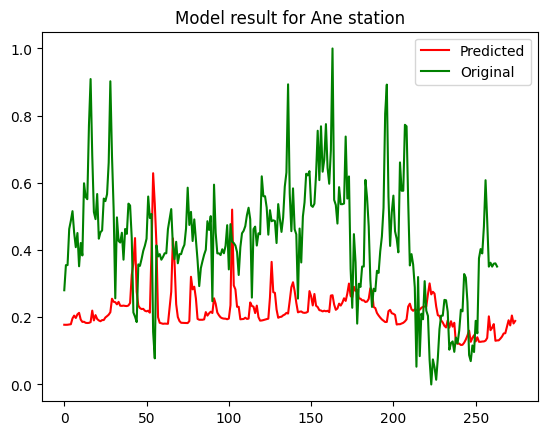

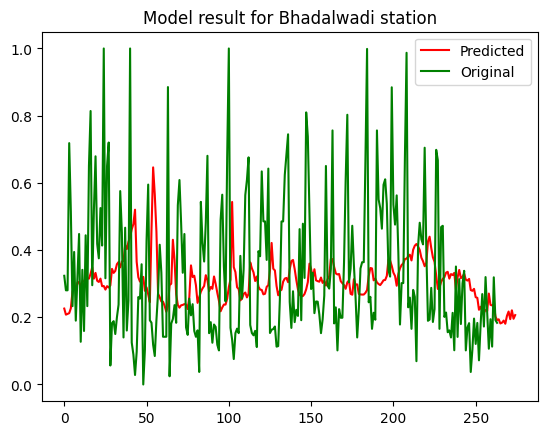

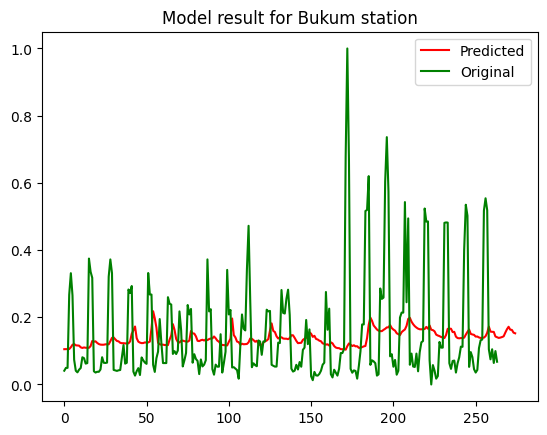

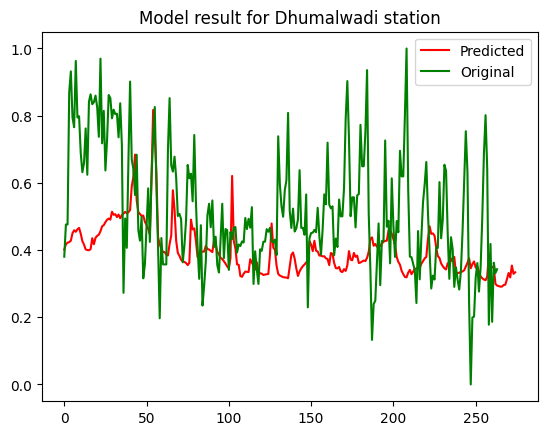

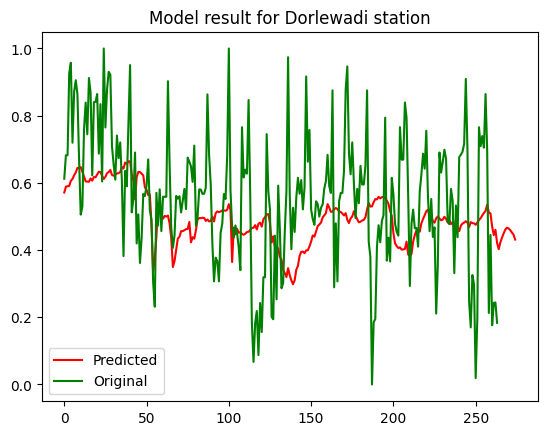

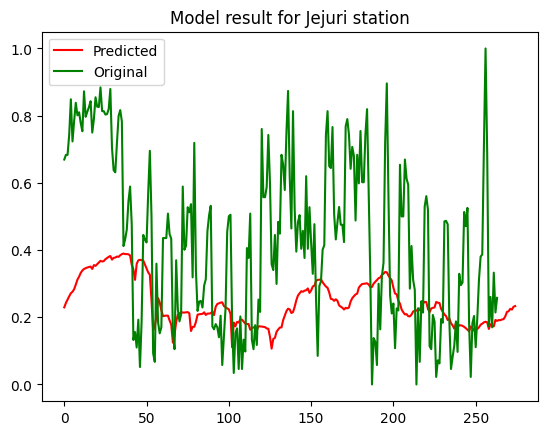

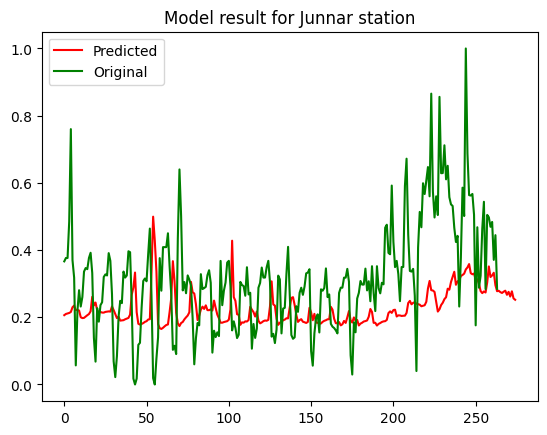

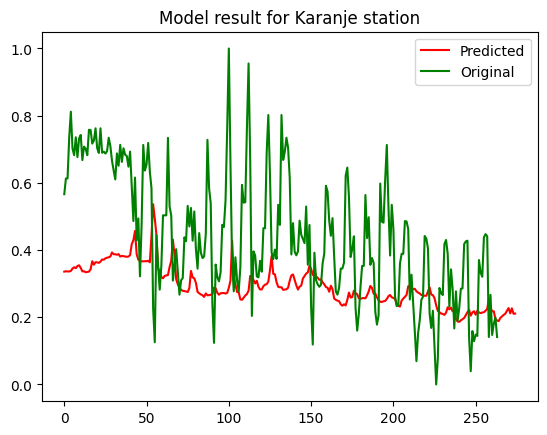

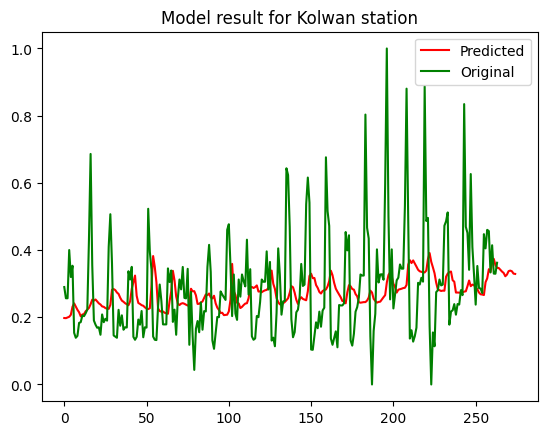

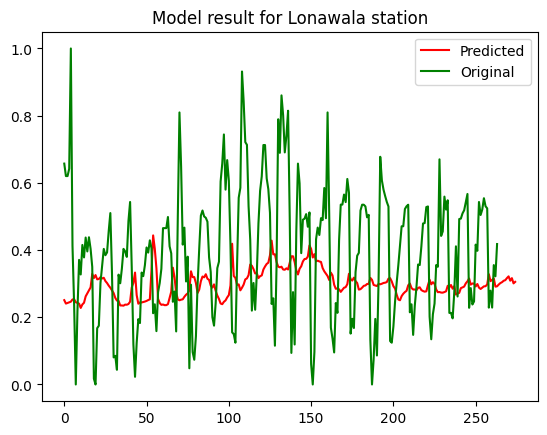

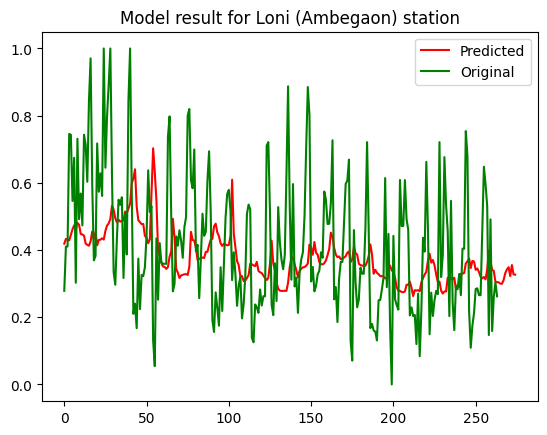

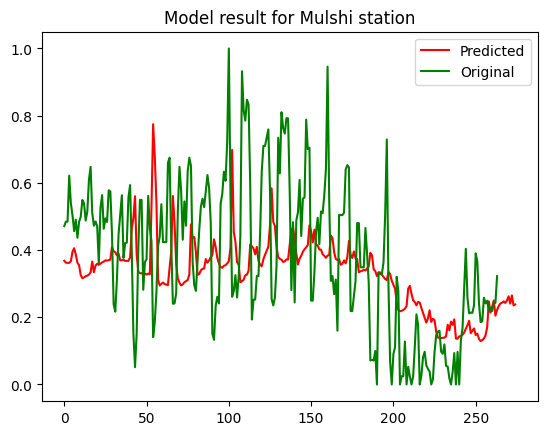

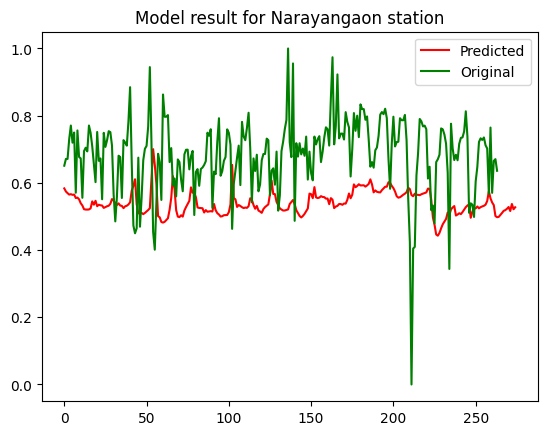

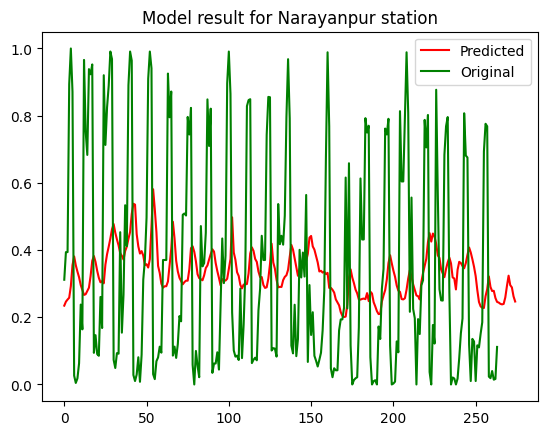

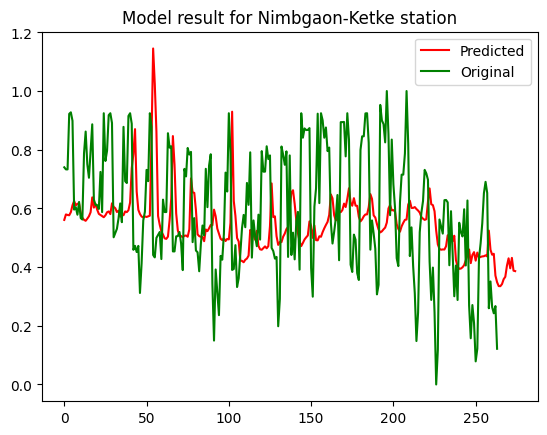

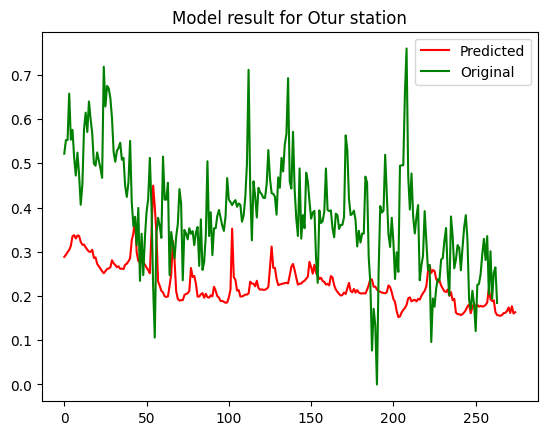

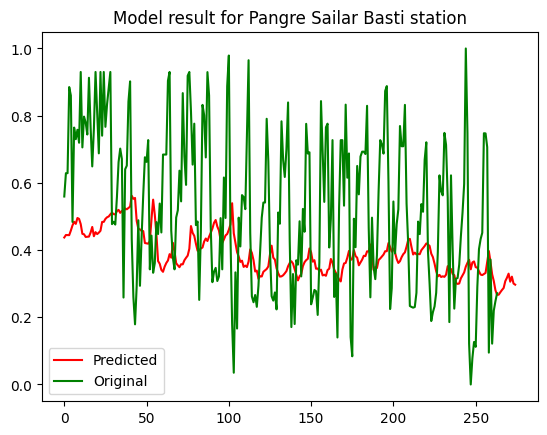

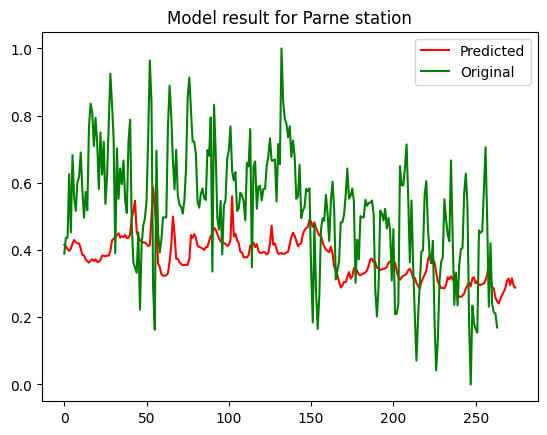

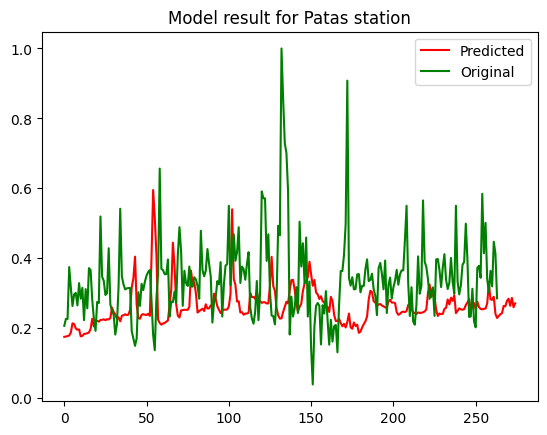

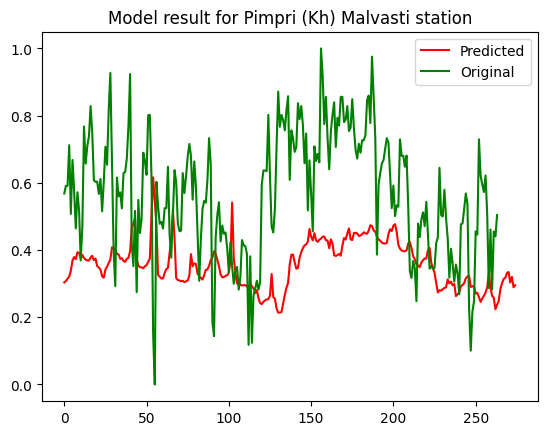

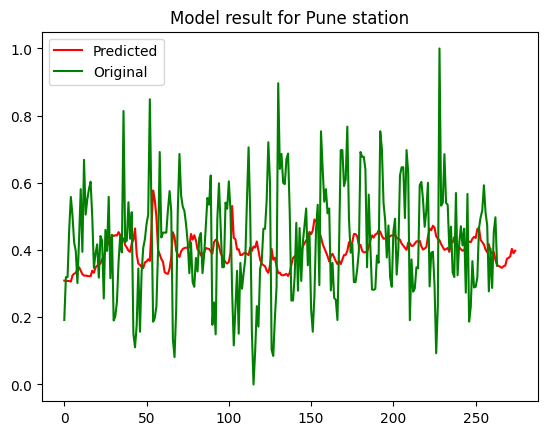

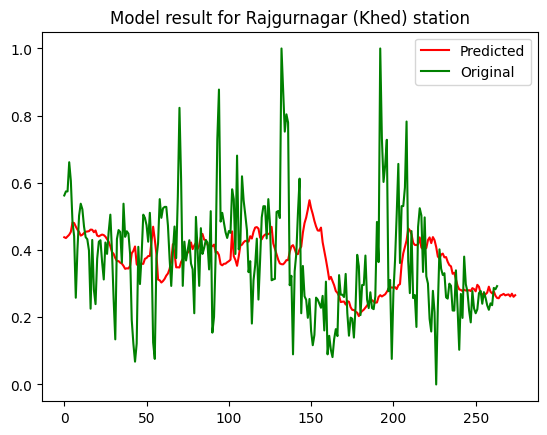

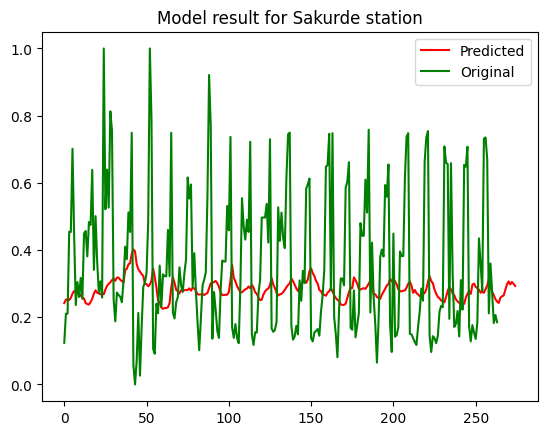

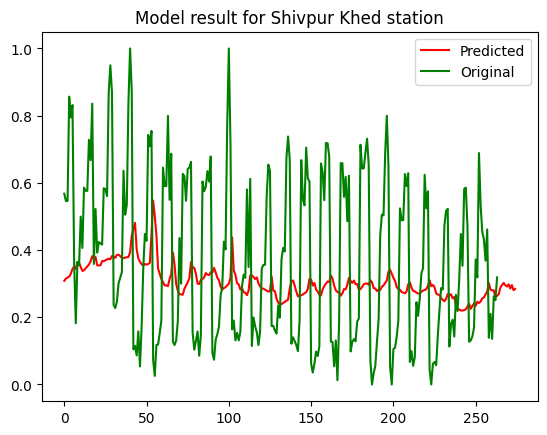

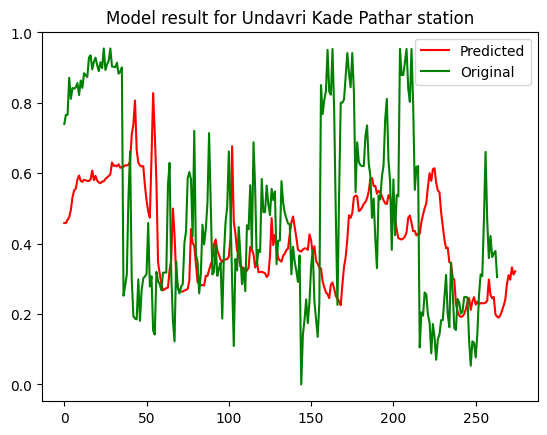

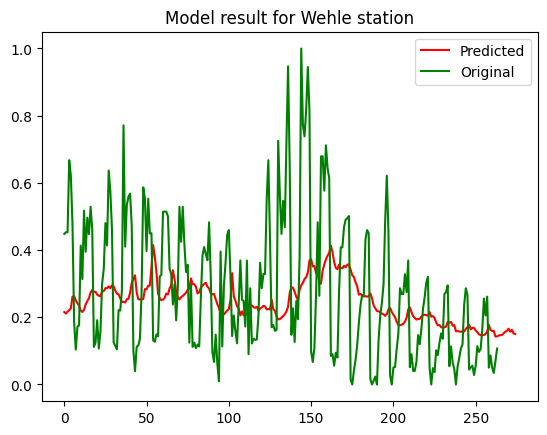

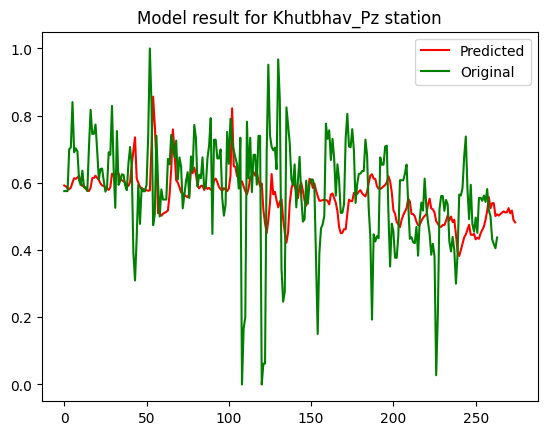

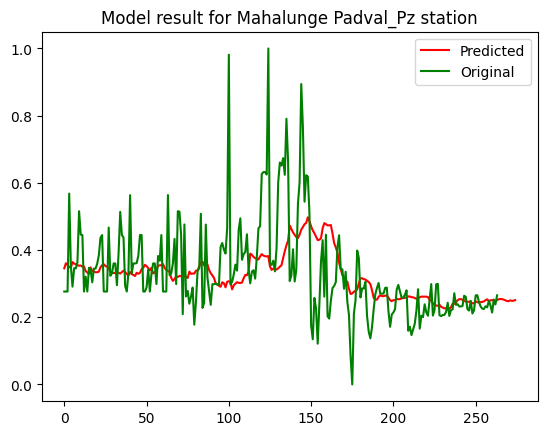

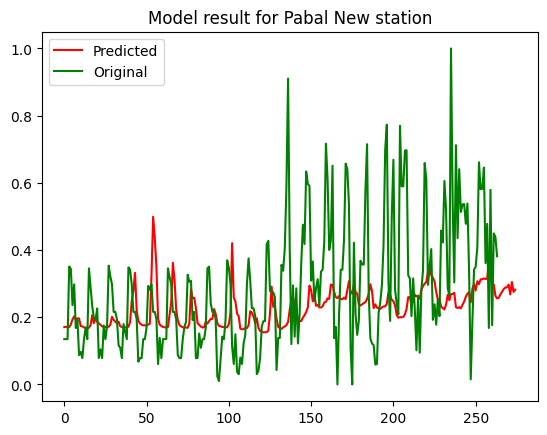

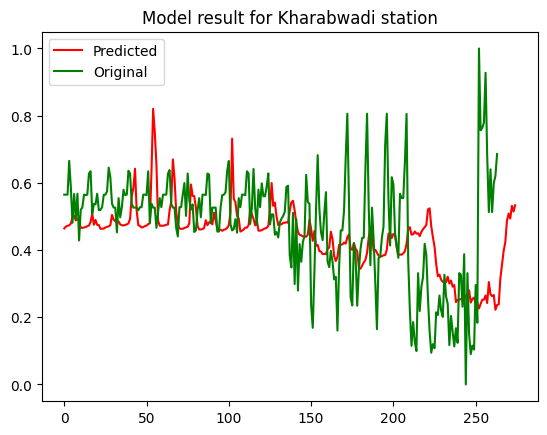

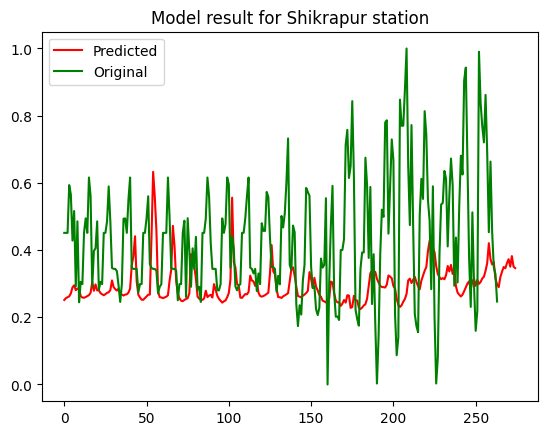

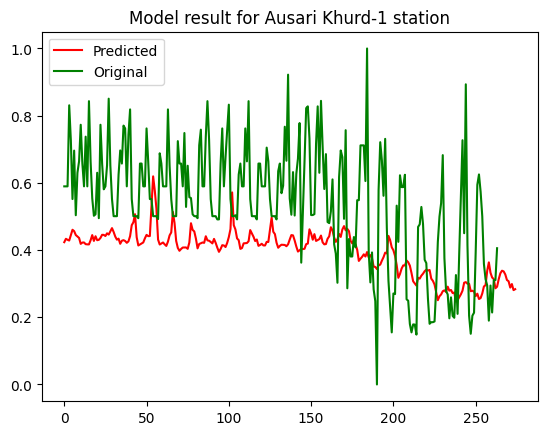

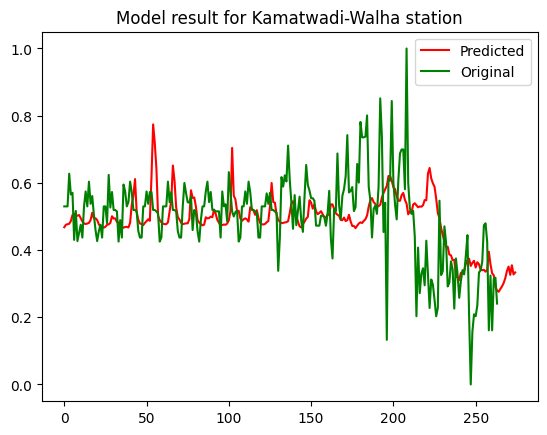

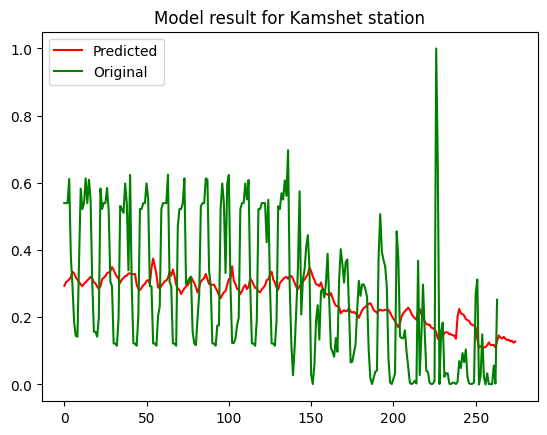

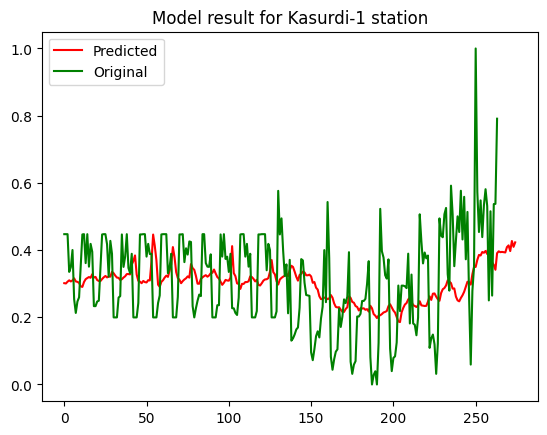

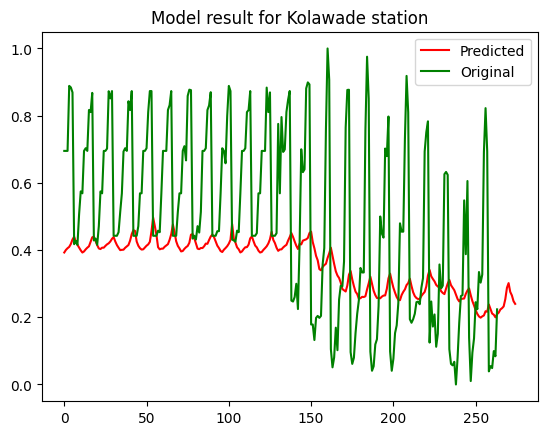

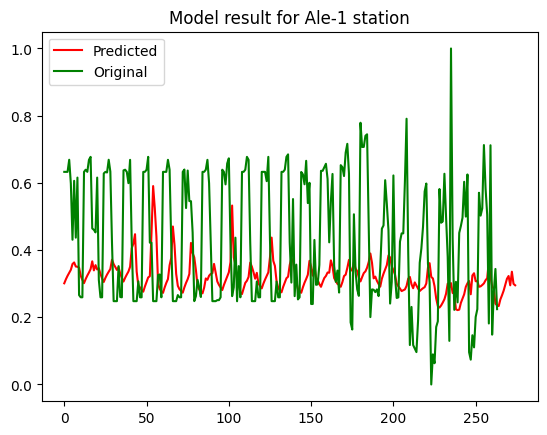

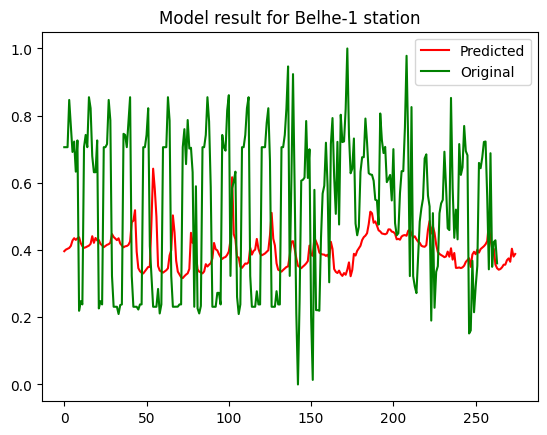

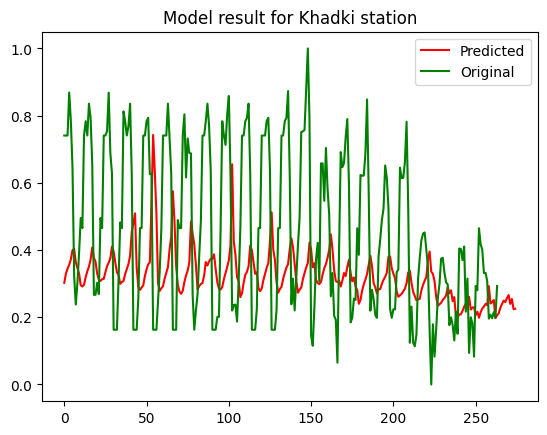

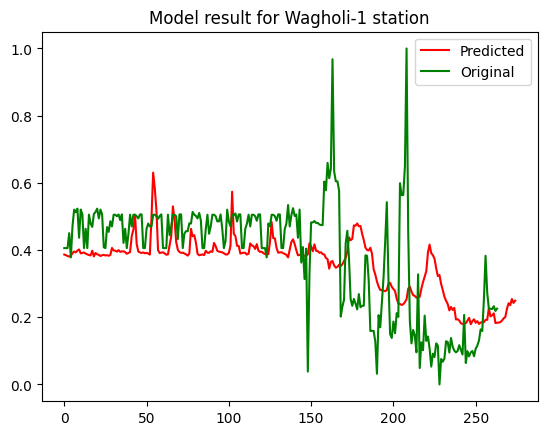

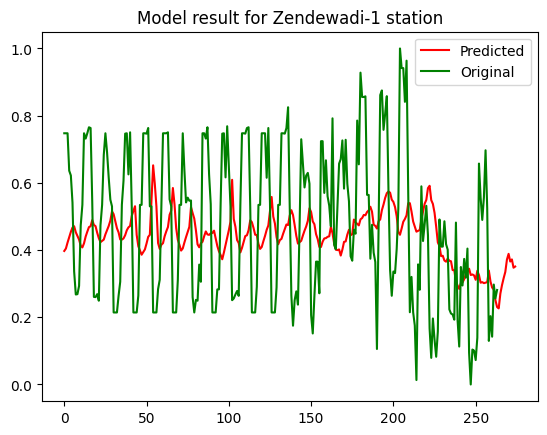

In [21]:
# plt.figure(fig_size=(11,5))
for column in data.columns[1:]:
    plt.plot(list(predictions_dict[column]),color='r',label = 'Predicted')
    plt.plot(list(data[column])[24:],color='g',label='Original')
    plt.title(f"Model result for {column} station")
    plt.legend()
    plt.show()

In [ ]:
# def make_predictions(n,lookback,data,models):
#     cols = list(models.keys())
#     y_rain = np.array(data['Rainfall'][-lookback:])
#     for i in range(n):
#         X_rain = list(y_rain[-lookback:])
#         X_rain = np.reshape(X_rain,(1,lookback,1))
#         # print("for X :",X_rain)
#         y_ = models['Rainfall'].predict(X_rain,verbose=0)
#         # scaler2.inverse_transform(y_)
#         # print("Y is: ",y_)
#         y_rain= np.append(y_rain,y_)
#     # print(y_rain)

#     plt.plot(y_rain)
#     for col in cols[1:]:
#         predictions_dict[col] = list(data[col][-lookback:])
#         # print("For Station: ", col)
#         for i in range(n):
#             a = np.array(predictions_dict[col][-lookback:])
#             X = np.array(y_rain[(-(n-i))])
#             # print(a.shape)
#             a = np.reshape(a, (1,lookback,1))
#             b = models[col].predict([a,X],verbose=0)
#             # print(b)
#             predictions_dict[col].append(float(b[0]))
#         plt.plot(predictions_dict[col],label=col)
#     plt.legend()
#     plt.show()

# plt.figure(figsize=(12,6))
# make_predictions(20,look_back,data,models)

In [22]:
import matplotlib.pyplot as plt
import numpy as np
forecasts = dict()
def plot_forecasts(models, data, look_back, n):
    """
    Plots the forecasted values for the next `n_months` for all columns in the dataset.

    Parameters:
        models (dict): Dictionary of trained models for each column.
        data (DataFrame): Original dataset.
        look_back (int): Number of past time steps used for prediction.
        n_months (int): Number of months to forecast.
    """
    rain = 'Rainfall'
    cols = list(models.keys())
    y_rain = np.array(data['Rainfall'][-look_back:])
    for i in range(n):
        X_rain = list(y_rain[-look_back:])
        X_rain = np.reshape(X_rain,(1,look_back,1))
        # print("for X :",X_rain)
        y_ = models['Rainfall'].predict(X_rain,verbose=0)
        # scaler2.inverse_transform(y_)
        # print("Y is: ",y_)
        y_rain= np.append(y_rain,y_)
    # print(y_rain)

    forecasts[rain] = y_rain
    plt.figure(figsize=(12, 6))
    plt.plot(y_rain)
    
    for column in data.columns[1:]:  # Forecast for each column
        # Extract historical data
        slice_data = data[[rain, column]].copy()
        
        # Prepare input sequence for forecasting
        X_seq, _ = prepare_data(slice_data, column, look_back)
        X_static = y_rain[-n:] # Last value as static feature (Rainfall)
        
        # Reshape inputs
        X_seq = np.reshape(X_seq, (X_seq.shape[0], X_seq.shape[1], 1))
        # X_static = np.reshape(X_static, (X_static.shape[0], 1))

        # Forecasting next n_months
        future_predictions = []
        last_seq = X_seq[-1]  # Get the last sequence as input

        for i in range(n):
            # Get static feature for the current month
            static_input = np.array([[X_static[i]]])  # Ensure correct shape
            
            # Predict next value
            pred = models[column].predict([last_seq[np.newaxis, :], static_input],verbose=0)[0, 0]
            future_predictions.append(pred)

            # Update sequence: Shift left and add new prediction
            last_seq = np.roll(last_seq, shift=-1)
            last_seq[-1] = pred

        forecasts[column] = future_predictions
        # Plot results
        # plt.plot(range(len(data[column])), data[column], label=f"Actual {column}", linestyle='dotted')
        # plt.plot(range(len(data[column]), len(data[column]) + n), future_predictions, label=f"Forecast {column}")

        # plt.xlabel("Time (Months)")
        # plt.ylabel("Values")
        # plt.legend()
        # plt.title(f"Forecast for Next {n} Months")
        # plt.show()


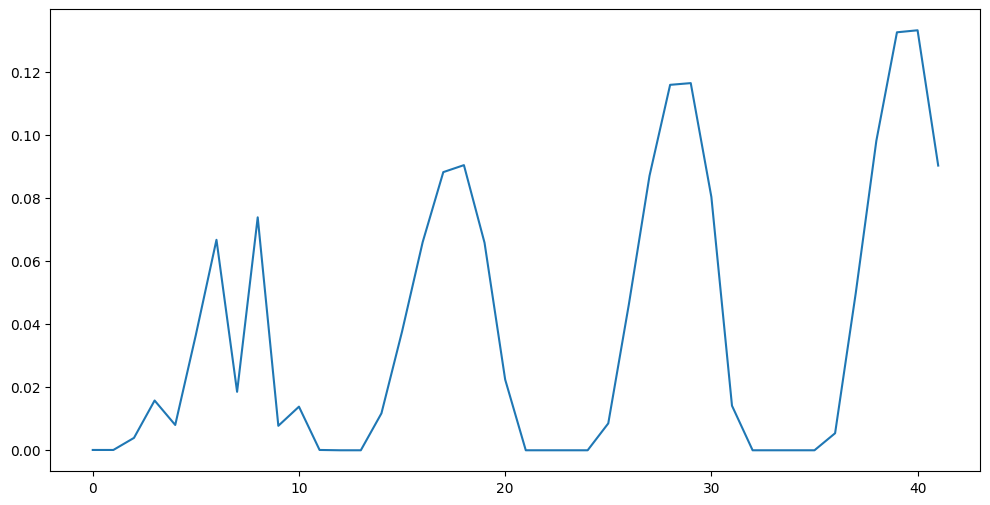

In [23]:
plot_forecasts(models, data, look_back, n=30)

In [24]:
for col in forecasts.keys():
    scale = data_scale[col]
    pred = forecasts[col]
   
    for i in range(len(pred)):
        pred[i] = (pred[i]*(scale[1] - scale[0])) + scale[0]
    forecasts[col] = pred

In [26]:
for col in data.columns:
    scale = data_scale[col]
    data[col] = (data[col]*(scale[1] - scale[0])) + scale[0]

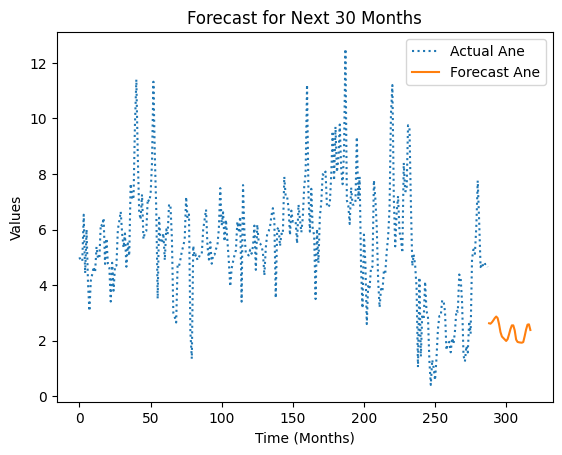

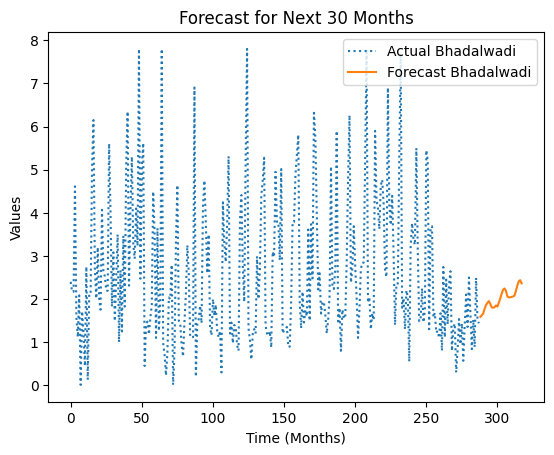

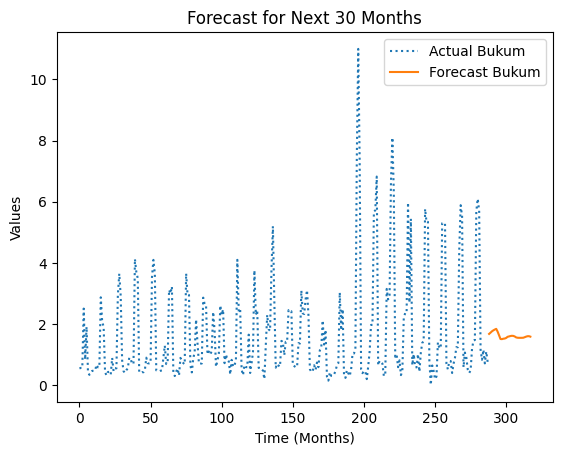

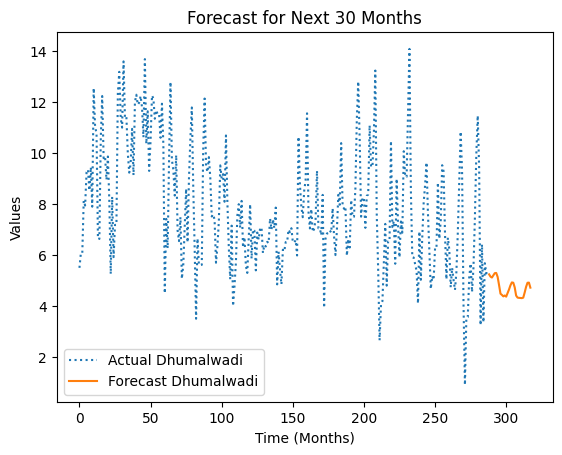

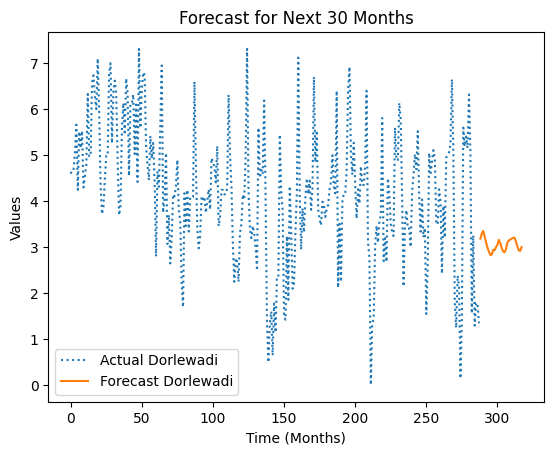

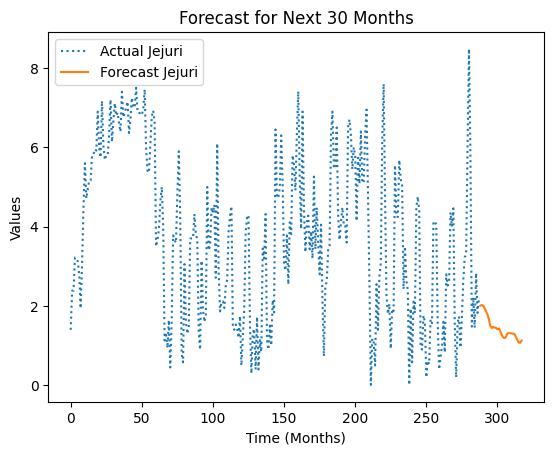

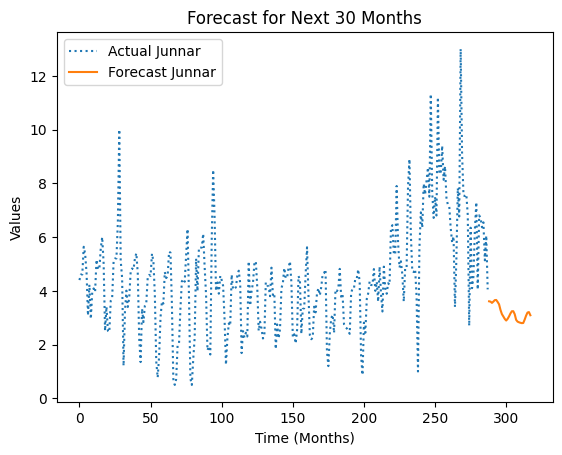

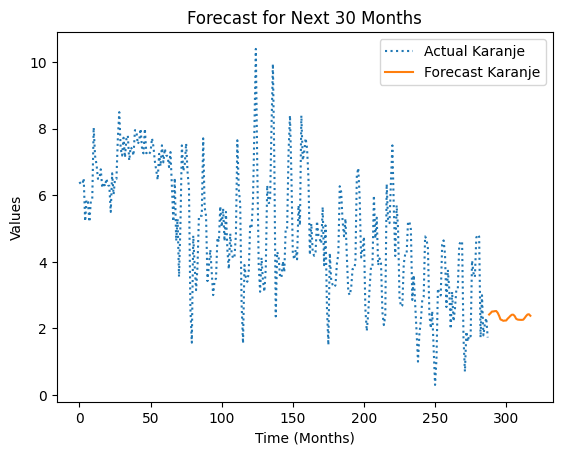

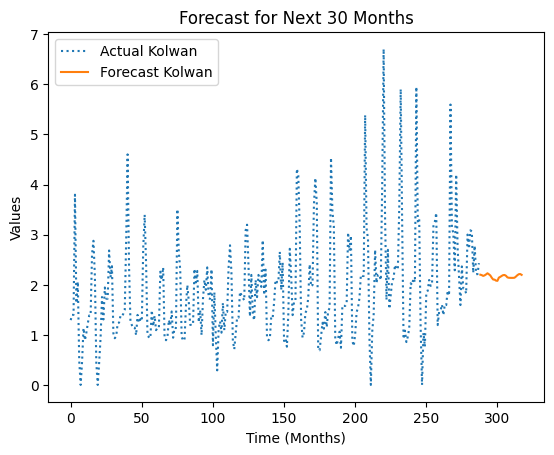

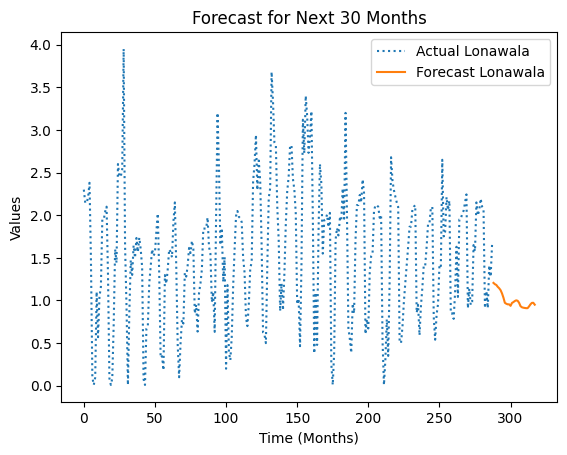

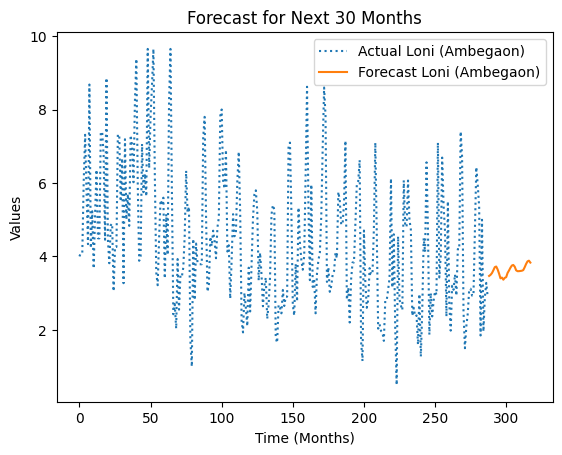

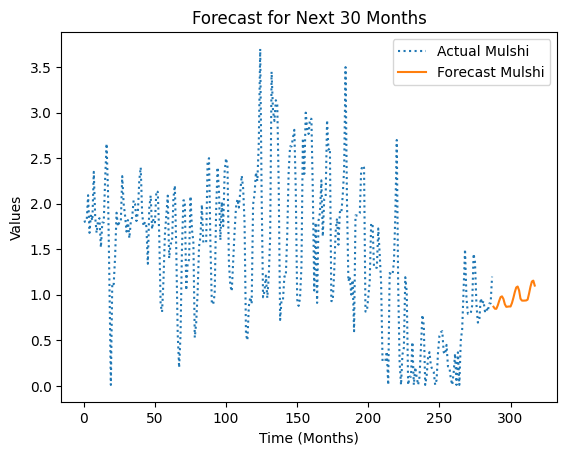

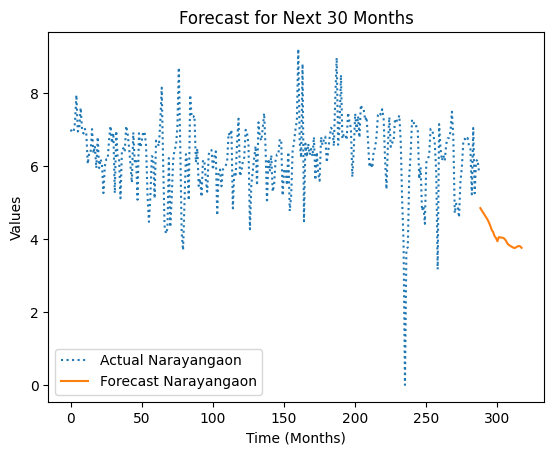

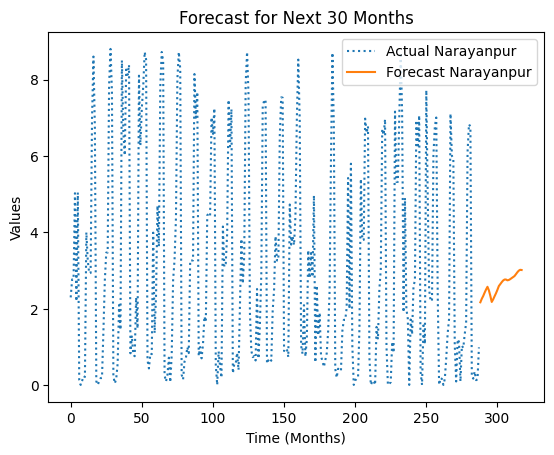

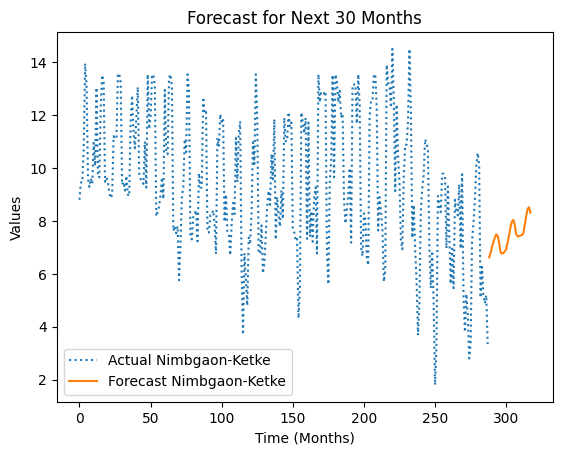

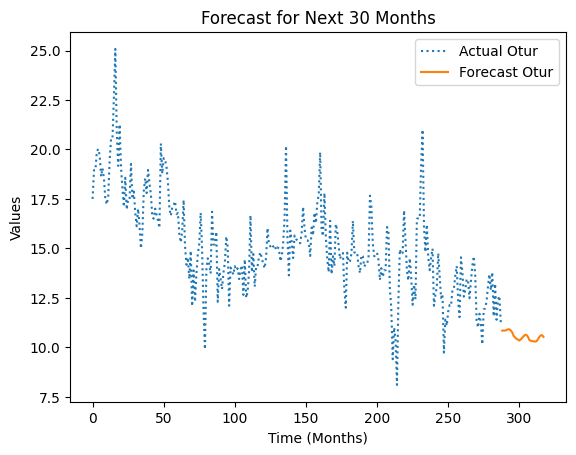

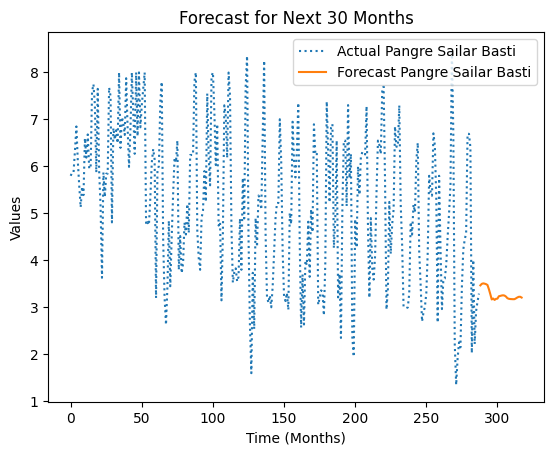

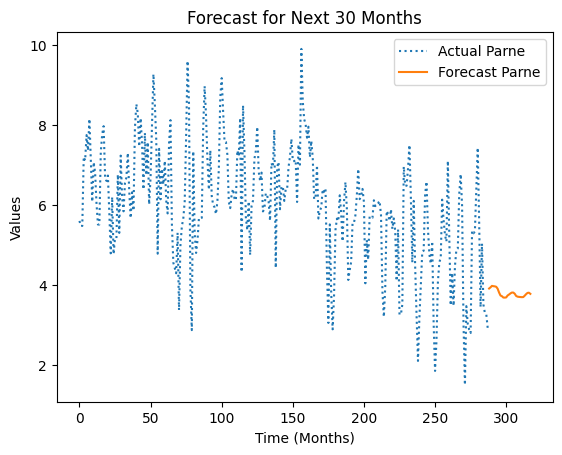

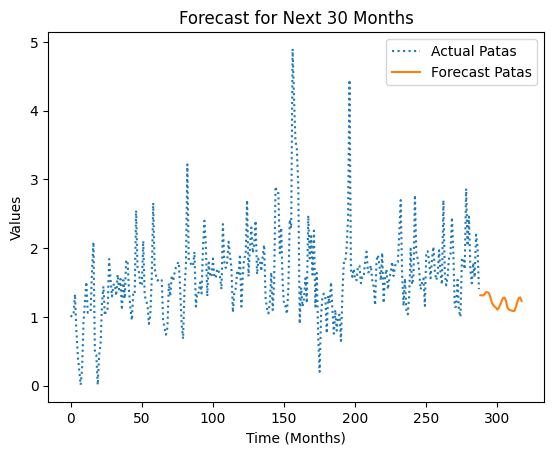

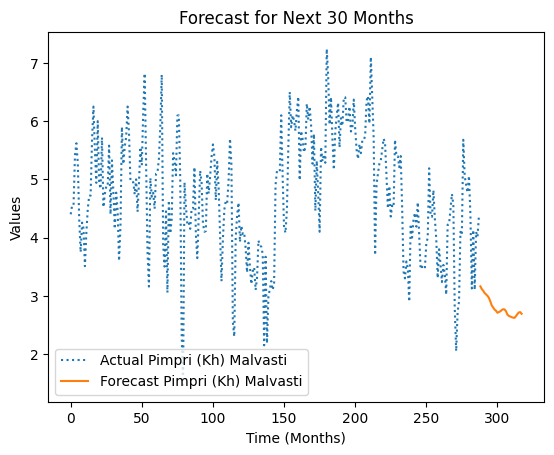

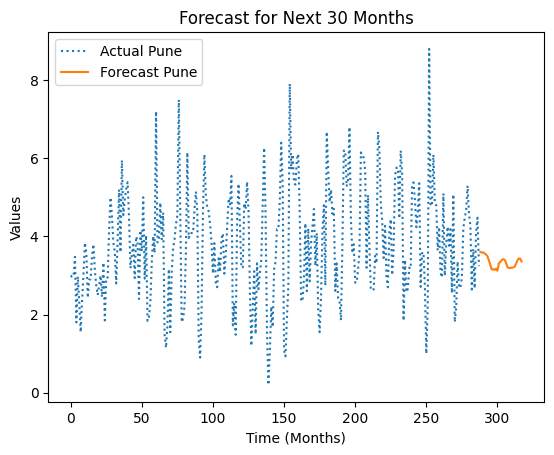

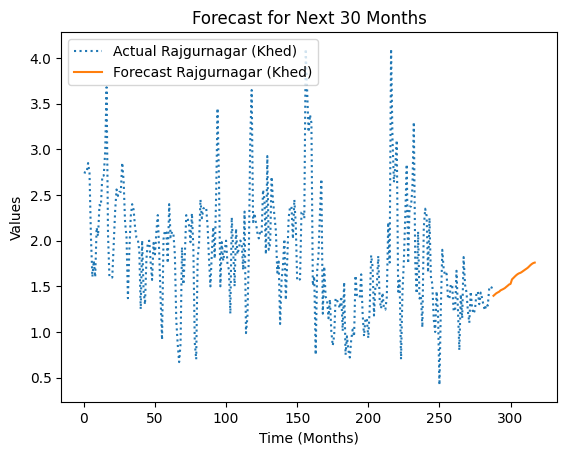

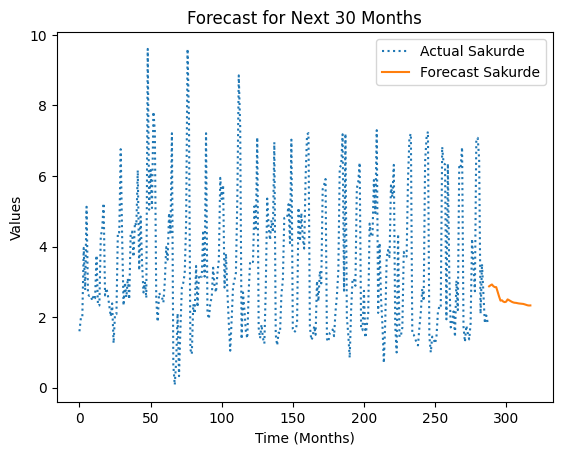

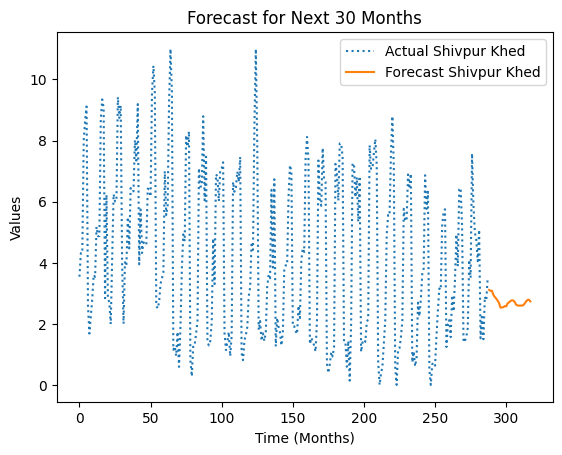

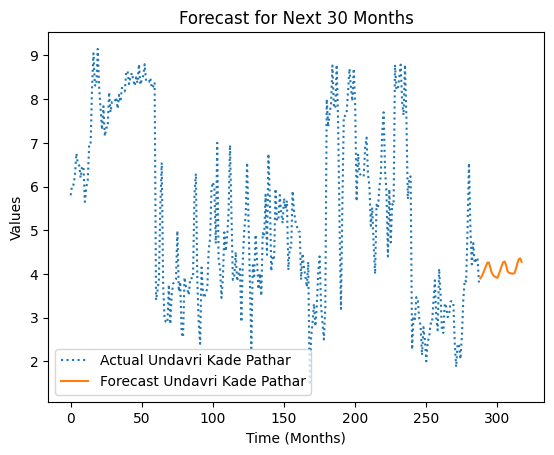

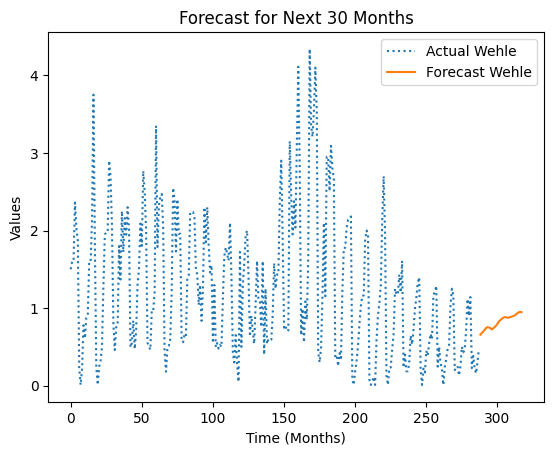

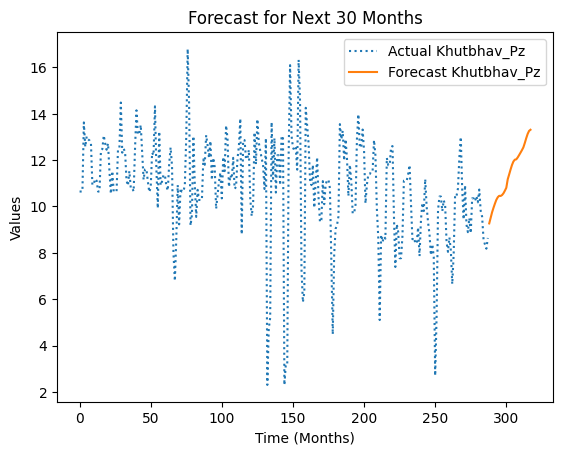

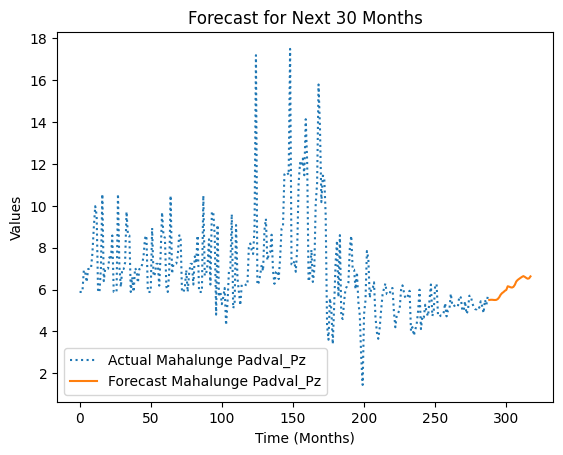

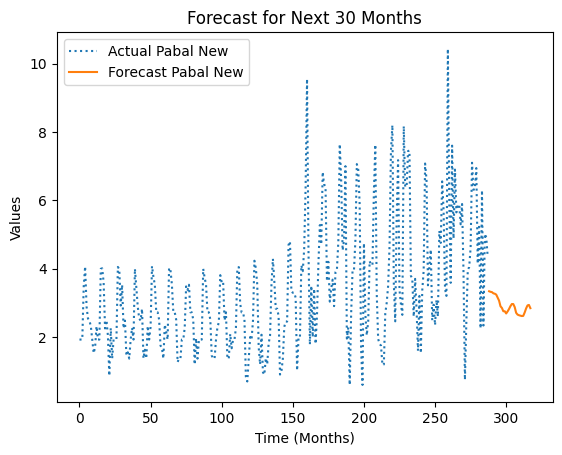

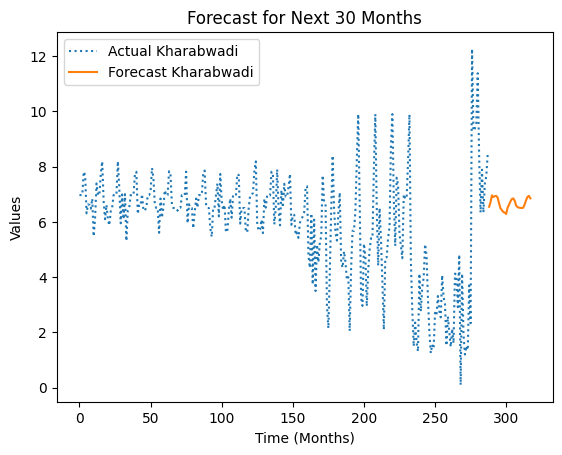

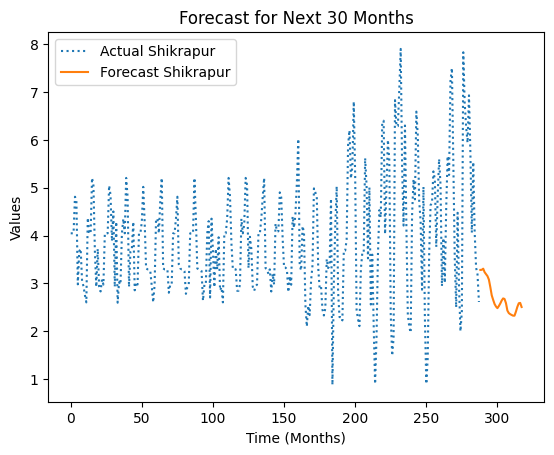

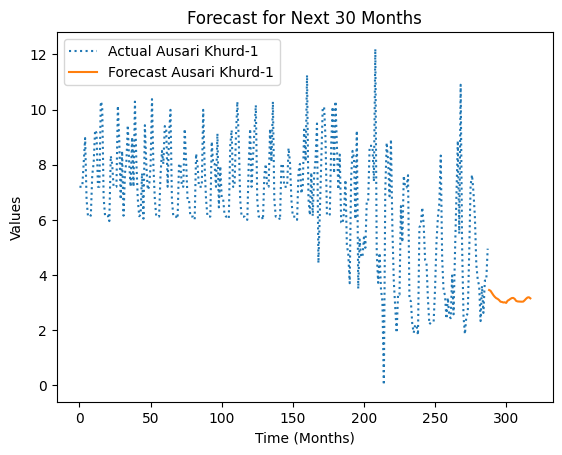

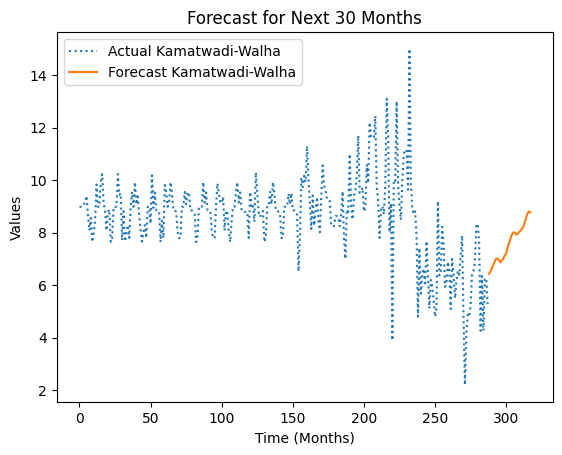

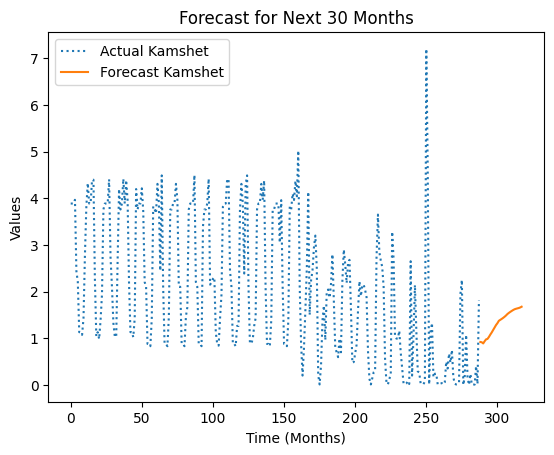

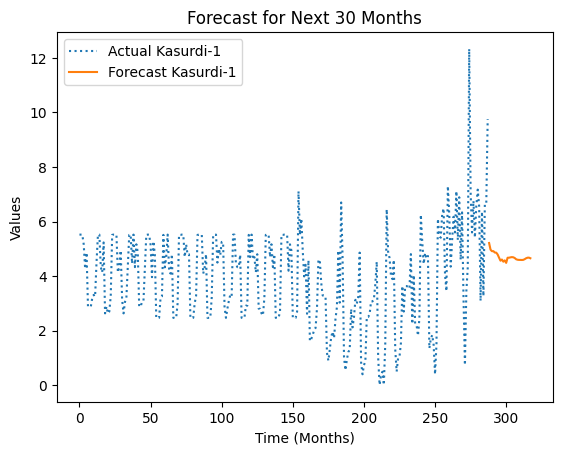

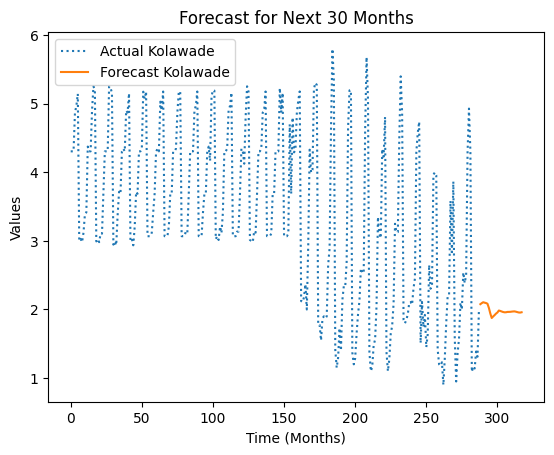

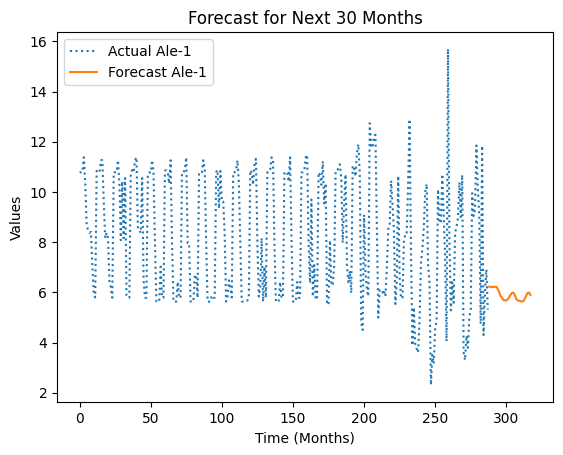

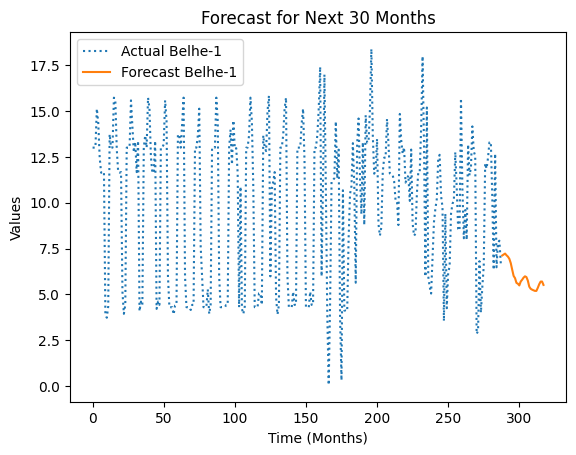

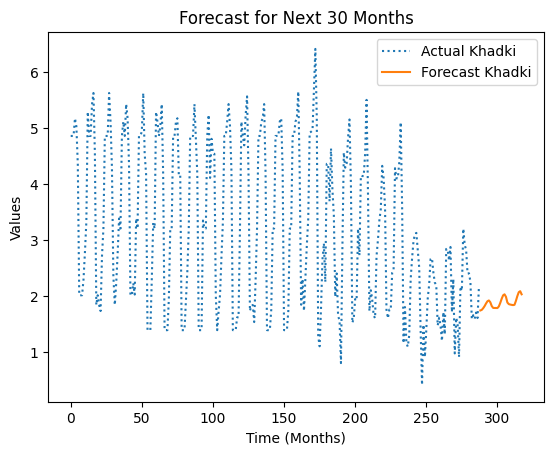

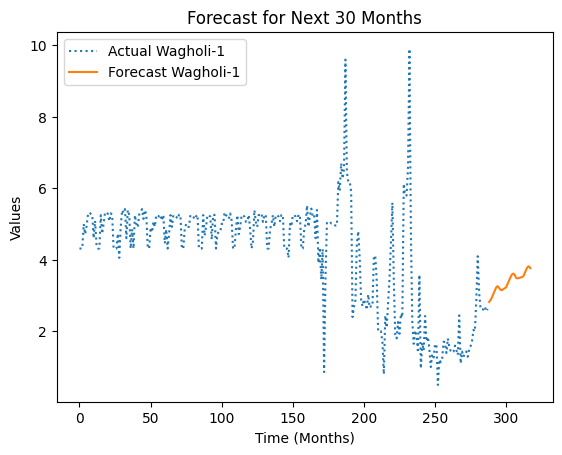

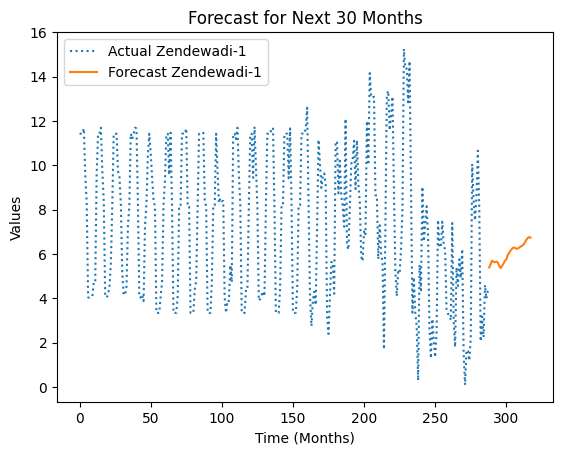

In [29]:
n=30
for column in predictions_dict.keys():
# Plot results
    plt.plot(range(len(data[column])), data[column], label=f"Actual {column}", linestyle='dotted')
    plt.plot(range(len(data[column]), len(data[column]) + n), forecasts[column], label=f"Forecast {column}")
    
    plt.xlabel("Time (Months)")
    plt.ylabel("Values")
    plt.legend()
    plt.title(f"Forecast for Next {n} Months")
    plt.show()


In [30]:
models['Rainfall'].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 48, 64)            16896     
                                                                 
 dense (Dense)               (None, 48, 64)            4160      
                                                                 
 dense_1 (Dense)             (None, 48, 128)           8320      
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2

In [31]:
models['Bhadalwadi'].summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 13, 1)]              0         []                            
                                                                                                  
 lstm_3 (LSTM)               (None, 13, 64)               16896     ['input_3[0][0]']             
                                                                                                  
 dense_15 (Dense)            (None, 13, 64)               4160      ['lstm_3[0][0]']              
                                                                                                  
 tf.__operators__.getitem_1  (None, 64)                   0         ['dense_15[0][0]']            
  (SlicingOpLambda)                                                                         

In [32]:
cols = list(data.columns)
print(cols)

['Rainfall', 'Ane', 'Bhadalwadi', 'Bukum', 'Dhumalwadi', 'Dorlewadi', 'Jejuri', 'Junnar', 'Karanje', 'Kolwan', 'Lonawala', 'Loni (Ambegaon)', 'Mulshi', 'Narayangaon', 'Narayanpur', 'Nimbgaon-Ketke', 'Otur', 'Pangre Sailar Basti', 'Parne', 'Patas', 'Pimpri (Kh) Malvasti', 'Pune', 'Rajgurnagar (Khed)', 'Sakurde', 'Shivpur Khed', 'Undavri Kade Pathar', 'Wehle', 'Khutbhav_Pz', 'Mahalunge Padval_Pz', 'Pabal New', 'Kharabwadi', 'Shikrapur', 'Ausari Khurd-1', 'Kamatwadi-Walha', 'Kamshet', 'Kasurdi-1', 'Kolawade', 'Ale-1', 'Belhe-1', 'Khadki', 'Wagholi-1', 'Zendewadi-1']


In [46]:
import numpy as np

def iterative_forecast(model, last_data, look_back, n_future):
    if last_data is None or last_data.shape[0] < look_back:
        raise ValueError("Invalid `last_data`: Not enough historical data for forecasting.")

    forecasted_values = []
    input_seq = last_data.copy()

    for step in range(n_future):
        input_seq_reshaped = input_seq.reshape(1, look_back, input_seq.shape[1])
        
        next_pred = model.predict(input_seq_reshaped, verbose=0)
        
        if next_pred is None or len(next_pred) == 0:
            raise ValueError(f"Prediction failed at step {step}. Model returned empty output.")

        next_pred = next_pred[0]  # Extract single prediction
        forecasted_values.append(next_pred)

        # Shift input left and append new prediction
        input_seq = np.roll(input_seq, shift=-1, axis=0)
        input_seq[-1] = next_pred  

    return np.array(forecasted_values)


In [47]:
import matplotlib.pyplot as plt
import numpy as np

def plot_forecasts(y_pred, title="LSTM Forecast for Next 30 Months"):
    if y_pred is None or len(y_pred) == 0:
        raise ValueError("Forecast is empty. Check model predictions.")

    y_pred = np.array(y_pred)
    
    # Flatten if it's 2D
    if y_pred.ndim == 2:  
        y_pred = y_pred[:, 0]  

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(y_pred) + 1), y_pred, label="Predicted", marker='o', linestyle='solid')

    plt.xlabel("Time Steps (Months)")
    plt.ylabel("Value")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()


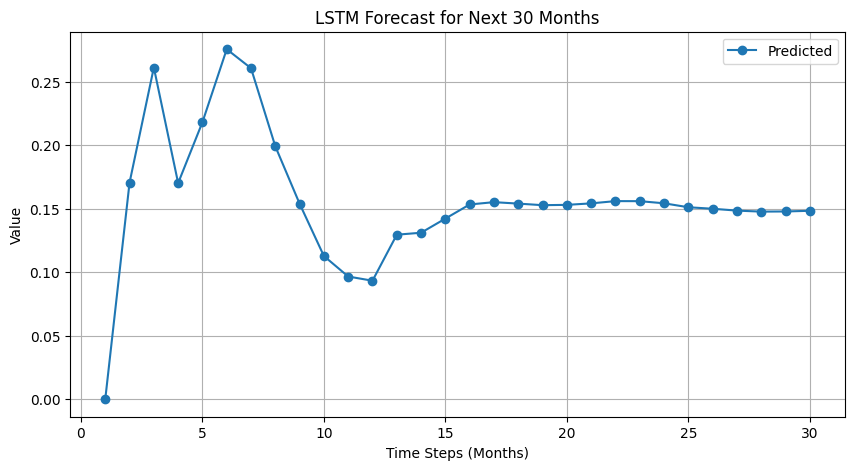

In [48]:
# Extract last `look_back` rows from dataset for forecasting
last_data = np.array(data)[-look_back:, :]  

# Forecast for next 30 months
forecast_30 = iterative_forecast(model, last_data, look_back, n_future=30)

# Plot results
plot_forecasts( y_pred=forecast_30, title="LSTM Forecast for Next 30 Months")
